<a href="https://colab.research.google.com/github/abj-paul/classworks/blob/master/Image_Skin_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install imgaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install ipyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import imageio
import ipyplot


        WARNING! Google Colab Environment detected!
        You might encounter issues while running in Google Colab environment.
        If images are not displaying properly please try setting `force_b64` param to `True`.
        


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
!pwd

/content


In [8]:
!ls /content/drive/MyDrive/temp/dataset/ibtd.zip

/content/drive/MyDrive/temp/dataset/ibtd.zip


In [9]:
!unzip /content/drive/MyDrive/temp/dataset/ibtd.zip

Archive:  /content/drive/MyDrive/temp/dataset/ibtd.zip
replace ibtd/0000.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: ibtd/0000.jpg           
replace ibtd/0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ibtd/0001.jpg           
  inflating: ibtd/0002.jpg           
  inflating: ibtd/0003.jpg           
  inflating: ibtd/0004.jpg           
  inflating: ibtd/0005.jpg           
  inflating: ibtd/0006.jpg           
  inflating: ibtd/0007.jpg           
  inflating: ibtd/0008.jpg           
  inflating: ibtd/0009.jpg           
  inflating: ibtd/0010.jpg           
  inflating: ibtd/0011.jpg           
  inflating: ibtd/0012.jpg           
  inflating: ibtd/0013.jpg           
  inflating: ibtd/0014.jpg           
  inflating: ibtd/0015.jpg           
  inflating: ibtd/0016.jpg           
  inflating: ibtd/0017.jpg           
  inflating: ibtd/0018.jpg           
  inflating: ibtd/0019.jpg           
  inflating: ibtd/0020.jpg           
  inflating: ibtd/002

In [17]:
img = imageio.imread("ibtd/0453.jpg")

In [49]:
a = 256
b = 256
c = 256

skin_array = [[ [0 for col in range(a)] for col in range(b)] for row in range(c)]

In [50]:
nonskin_array = [[ [0 for col in range(a)] for col in range(b)] for row in range(c)]

In [20]:
height, width, channels = img.shape

In [23]:
for x in range(height):
  for y in range(width):
    b = img[x][y][0] 
    g = img[x][y][1]
    r = img[x][y][2]
    skin_array[r][g][b] = skin_array[r][g][b] + 1;

In [24]:
print(skin_array[0][0])

[12, 12, 0, 22, 26, 5, 23, 14, 16, 8, 10, 2, 7, 6, 2, 3, 4, 4, 5, 4, 2, 3, 1, 3, 4, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
image_count = 555

In [29]:
indices = ["%04d" % x for x in range(1000)]

In [52]:
for image_index in range(555):
    mask_img_name = "ibtd/Mask/"+str(indices[image_index])+".bmp"
    unmask_img_name = "ibtd/"+str(indices[image_index])+".jpg"

    mask_img = imageio.imread(mask_img_name)
    unmask_img = imageio.imread(unmask_img_name)
    height, width, channels = mask_img.shape

    for x in range(height):
      for y in range(width):
        b=mask_img[x][y][0]
        g=mask_img[x][y][1]
        r=mask_img[x][y][2]

        if r>250 and g>250 and b>250:
          b = unmask_img[x][y][0] 
          g = unmask_img[x][y][1] 
          r = unmask_img[x][y][2]
          #print(mask_img_name,image_index,r,g,b)
          nonskin_array[r][g][b] = nonskin_array[r][g][b] + 1
        else:
          skin_array[r][g][b] = skin_array[r][g][b] + 1

    



In [53]:
# Learning Probablity
skin_sum = 0
nonskin_sum = 0
for x in range(255):
  for y in range(255):
    skin_sum = skin_sum + sum(skin_array[x][y])
    nonskin_sum = nonskin_sum + sum(nonskin_array[x][y])

In [55]:
def divide(x,y):
  if y==0:
    return 0
  else:
    return x/y

In [58]:
a = 256
b = 256
c = 256
learn_array = [[ [0 for col in range(a)] for col in range(b)] for row in range(c)]

for x in range(255):
  for y in range(255):
    for z in range(255):
      skin_array[x][y][z] = divide(skin_array[x][y][z] , skin_sum)
      nonskin_array[x][y][z] = divide(nonskin_array[x][y][z] , nonskin_sum)
      learn_array[x][y][z] = divide(skin_array[x][y][z] , nonskin_array[x][y][z])

In [109]:
# Testing
#test_image_name = "ibtd/0035.jpg"
test_image_name = "/content/drive/MyDrive/temp/dataset/beautiful-face-young-woman-health-fresh-skin-perfect-eyes-beautiful-face-young-woman-health-fresh-skin-157476477.jpg"
test_image = imageio.imread(test_image_name)

In [110]:
T = 0.35

height, width, channel = test_image.shape

for x in range(height):
  for y in range(width):
    b=test_image[x][y][0]
    g=test_image[x][y][1]
    r=test_image[x][y][2]

    if abs(learn_array[r][g][b])<T:
      test_image[x][y][0] = 255
      test_image[x][y][1] = 255
      test_image[x][y][2] = 255


In [69]:
import matplotlib.pyplot as plt

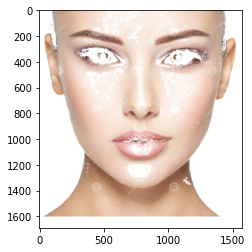

In [111]:
plt.imshow(test_image)